In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [3]:
hotel_data = pd.read_csv("C:/Users/ameer/Desktop/dmt-2024-2nd-assignment/training_set_VU_DM.csv")

In [3]:
#get summary descriptive data for all continuous variables
hotel_data.describe(include = ["float64"])

,visitor_hist_starrating,visitor_hist_adr_usd,prop_review_score,prop_location_score1,prop_location_score2,prop_log_historical_price,price_usd,srch_query_affinity_score,orig_destination_distance,comp1_rate,...,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,gross_bookings_usd
count,251866.000000,252988.000000,4.950983e+06,4.958347e+06,3.867999e+06,4.958347e+06,4.958347e+06,317406.000000,3.350565e+06,119930.000000,...,240157.000000,260976.000000,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,138390.000000
mean,3.374334,176.022659,3.777777e+00,2.872589e+00,1.303852e-01,4.317913e+00,2.542096e+02,-24.146418,1.301234e+03,0.479788,...,0.128329,0.075957,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,386.283316
std,0.692519,107.254493,1.050329e+00,1.531011e+00,1.594634e-01,1.834869e+00,1.600124e+04,15.743238,2.023951e+03,0.641565,...,0.559841,0.302668,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,821.190577
min,1.410000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-326.567500,1.000000e-02,-1.000000,...,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000
25%,2.920000,109.810000,3.500000e+00,1.790000e+00,1.900000e-02,4.450000e+00,8.500000e+01,-30.774775,1.398000e+02,0.000000,...,0.000000,0.000000,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,124.000000
50%,3.450000,152.240000,4.000000e+00,2.770000e+00,6.900000e-02,4.910000e+00,1.220000e+02,-20.451300,3.866000e+02,1.000000,...,0.000000,0.000000,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,218.400000
75%,3.930000,213.490000,4.500000e+00,4.040000e+00,1.805000e-01,5.310000e+00,1.849600e+02,-13.350625,1.500670e+03,1.000000,...,0.000000,0.000000,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,429.790000
max,5.000000,1958.700000,5.000000e+00,6.980000e+00,1.000000e+00,6.210000e+00,1.972633e+07,-2.494100,1.166664e+04,1.000000,...,1.000000,1.000000,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,159292.380000


In [4]:
#check NA data
print(hotel_data.isnull().sum())

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

In [3]:
numeric_cols = hotel_data.select_dtypes(include=["float64"]).columns.tolist()

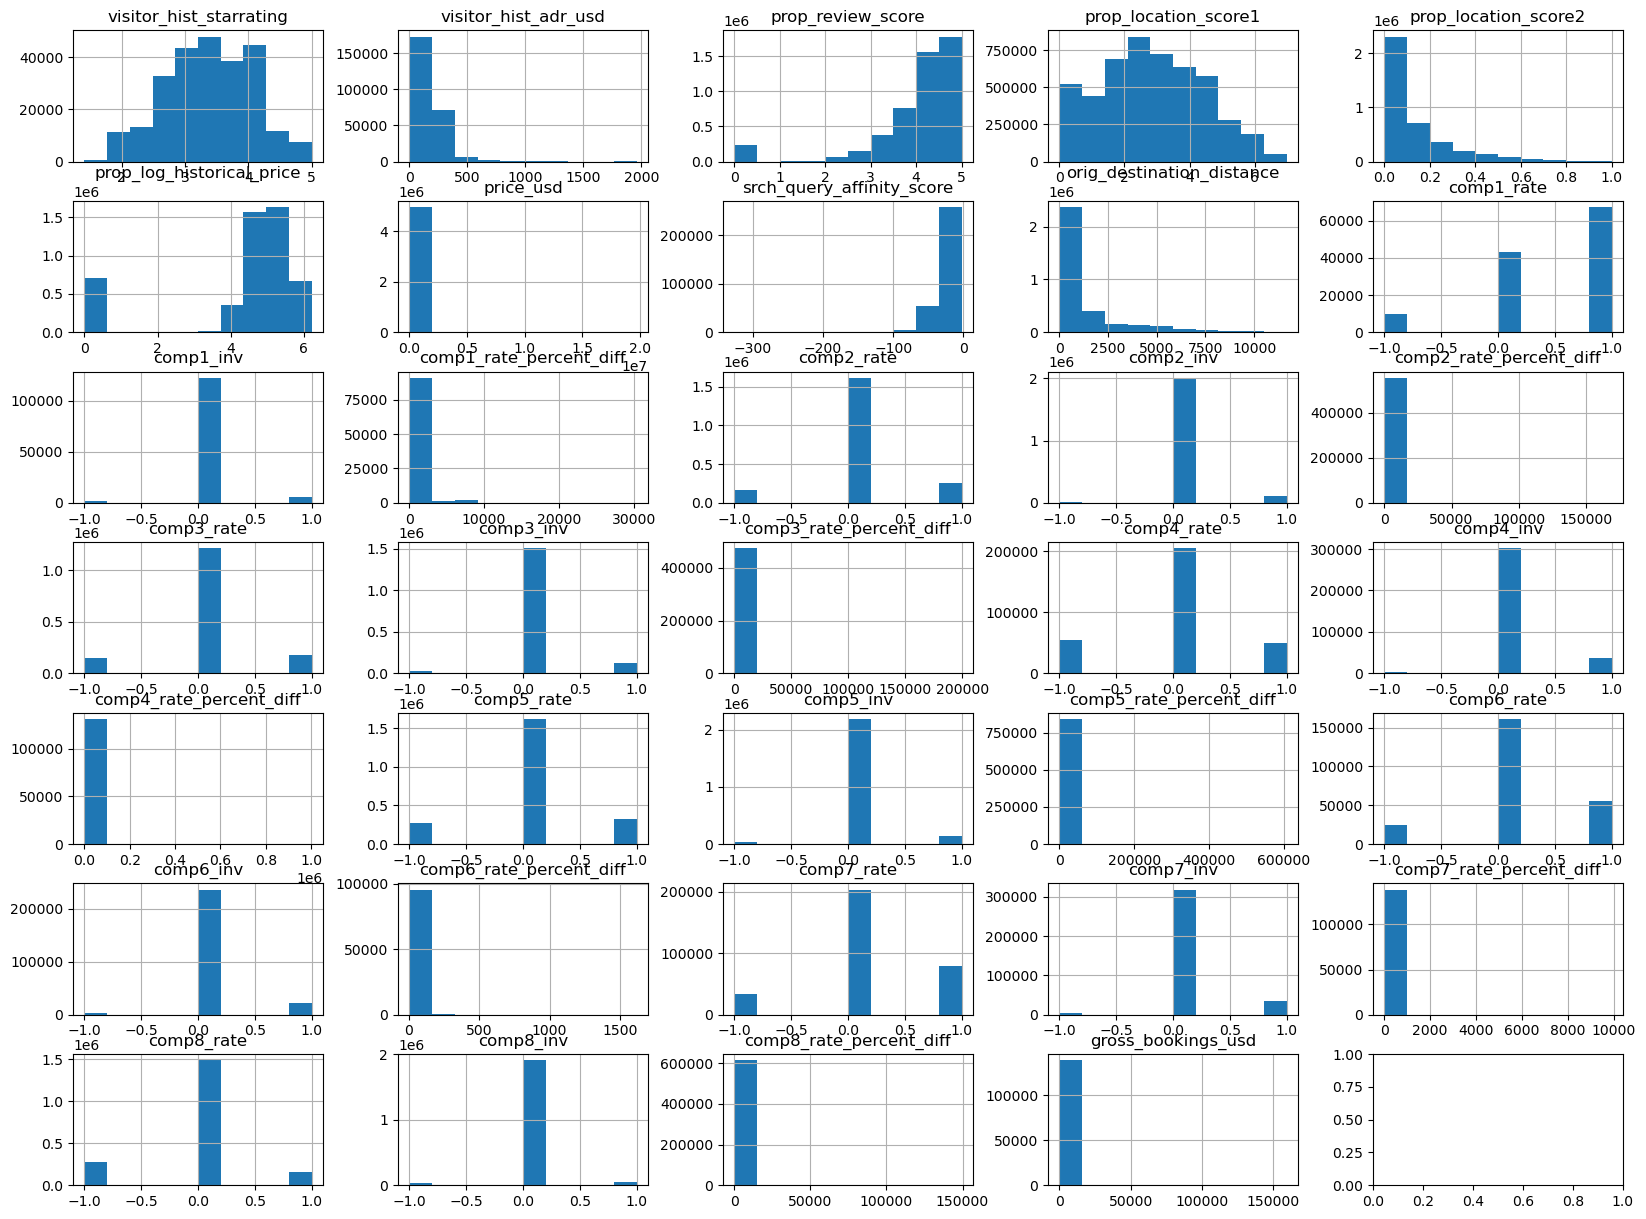

In [38]:
#make histograms for continuous data.. inspect distribution
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(20, 15))

for i, col in enumerate(numeric_cols):
    hotel_data.hist(col, ax=axes.flatten()[i])

In [3]:
categorical_cols = hotel_data.select_dtypes(include=["int64"]).columns.tolist()

In [ ]:
# Correlation heatmap
corr = hotel_data[numeric_cols].corr()

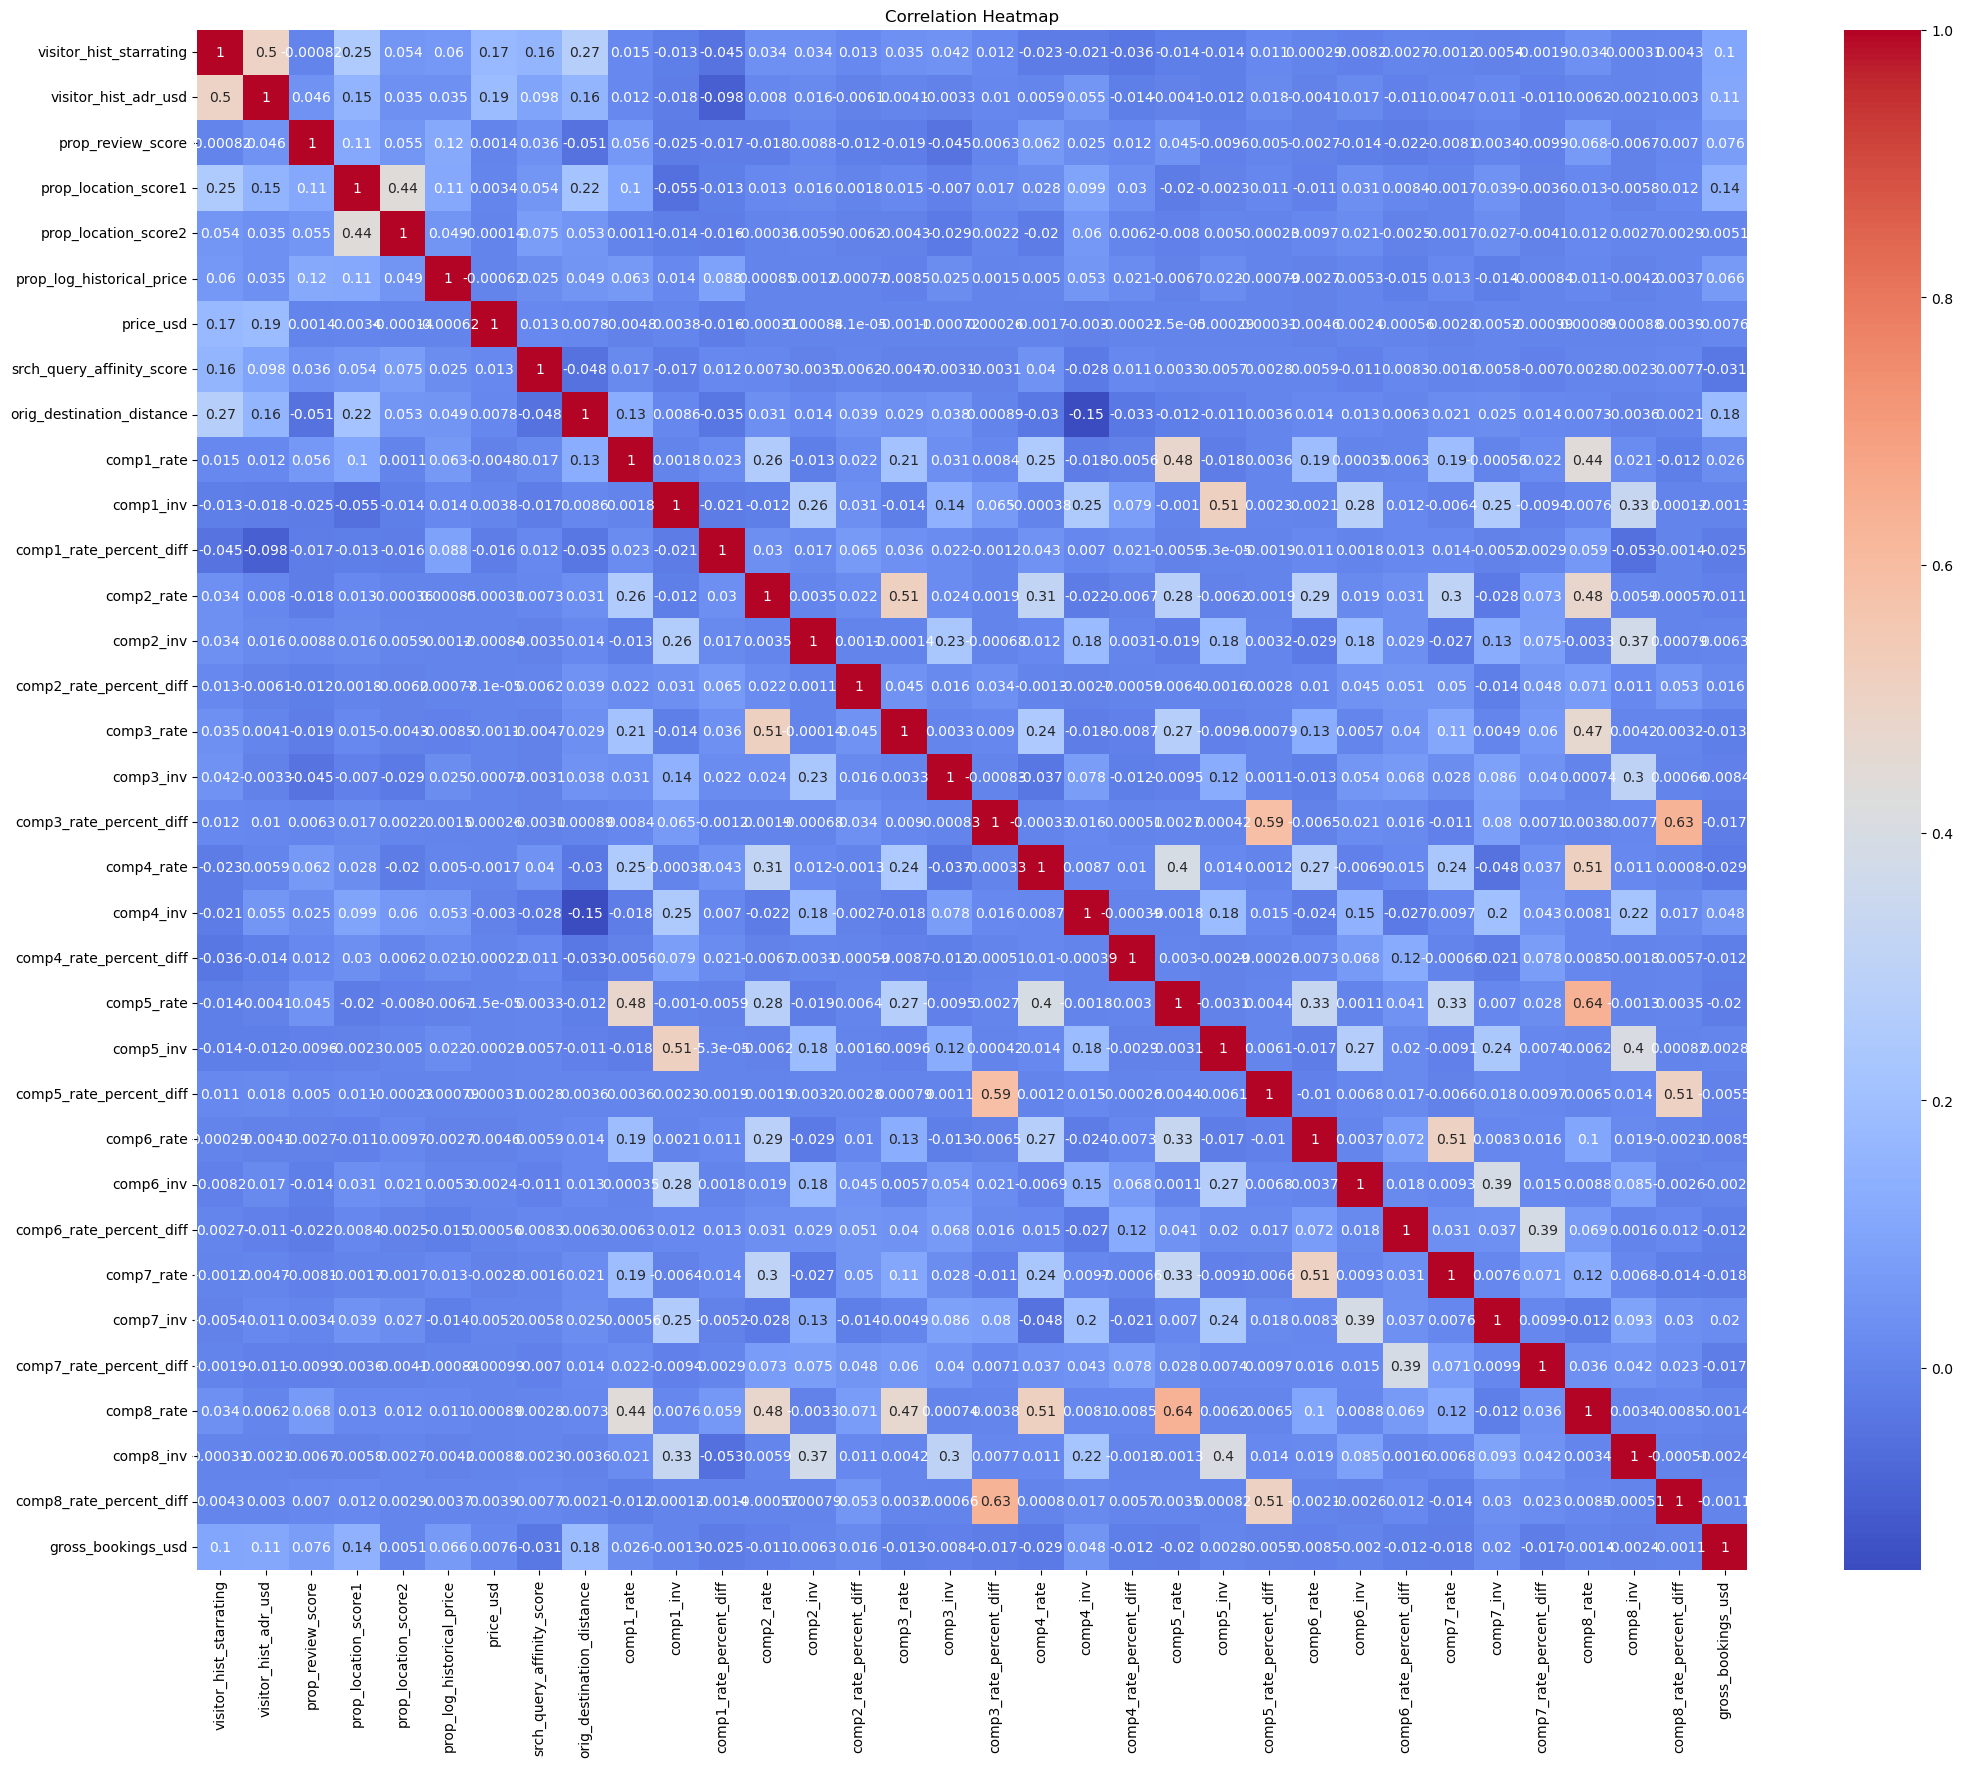

In [8]:
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [5]:
hotel_data.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [4]:
print(len(hotel_data["srch_id"].unique())) #A total of 199795 searches
print(hotel_data.shape[0]) #a total of 4958347 shown results
pd.crosstab(hotel_data["click_bool"],hotel_data["booking_bool"]) 

199795
4958347


booking_bool,0,1
click_bool,,
0,4736468,0
1,83489,138390


In [9]:
pd.crosstab(hotel_data["click_bool"],hotel_data["booking_bool"], normalize='all')*100

booking_bool,0,1
click_bool,,
0,95.525142,0.000000
1,1.683807,2.791051


In [28]:
hotel_data.head(1)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [11]:
booked_data = hotel_data[hotel_data["booking_bool"] == 1]

In [31]:
booked_data.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [13]:
convert_cols = ["visitor_location_country_id", "prop_country_id", "prop_id", "prop_brand_bool",
                "position", "promotion_flag", 'srch_destination_id', 'srch_saturday_night_bool',
                'random_bool', ]
for col in convert_cols:
    booked_data[col] = booked_data[col].astype('category')


In [14]:
booked_data_X = booked_data.drop(columns = ["prop_id"])
booked_data_Y = booked_data["prop_id"]

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(booked_data_X, booked_data_Y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

print("Imputation finished")
# Initialize logistic regression model
model = LogisticRegression()

print("Fitting: ...")
# Train the model on the training set
model.fit(X_train_imputed, y_train)

print("Predicting: ...")
# Predict on the testing set
y_pred = model.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Imputation finished
Fitting: ...
Predicting: ...
Accuracy: 0.002167630057803468


c:\Users\ameer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
#sampled_df = booked_data.sample(frac=0.1, random_state=42)
# sample_size = int(0.1 * len(booked_data))
# sampled_df = booked_data.groupby('srch_id', group_keys=False).apply(lambda x: x.sample(n=min(len(x), sample_size)))

sampled_df = pd.read_csv("C:/Users/ameer/Desktop/stratified sampled dataset.csv")

In [3]:
sampled_df = sampled_df.drop(columns = ['srch_id', "date_time", 'click_bool', "booking_bool"])

convert_cols = ["visitor_location_country_id", "prop_country_id", "prop_id", "prop_brand_bool",
                "position", "promotion_flag", 'srch_destination_id', 'srch_saturday_night_bool',
                'random_bool', ]
for col in convert_cols:
    sampled_df[col] = sampled_df[col].astype('category')

booked_data_X = sampled_df.drop(columns = ["prop_id"])
booked_data_Y = sampled_df["prop_id"]

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(booked_data_X, booked_data_Y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

print("Imputation finished")
# Initialize logistic regression model
model = LogisticRegression()

print("Fitting: ...")
# Train the model on the training set
model.fit(X_train_imputed, y_train)

print("Predicting: ...")
# Predict on the testing set
y_pred = model.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Imputation finished
Fitting: ...


In [4]:
my_prop_id = sampled_df.prop_id.unique()
y_benchmark = random.choices(my_prop_id, k = y_test.shape[0])
print(accuracy_score(y_test, y_benchmark))

NameError: name 'y_test' is not defined